In [9]:
import os, sys
import numpy as np
import pandas as pd
import seaborn as sns

#for plot with ATLAS styple
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

#import mplhep as hep
#hep.style.use(hep.style.ROOT) # For now ROOT defaults to CMS
# Or choose one of the experiment styles
#hep.style.use(hep.style.ATLAS)
#plt.style.use(hep.style.ATLAS)
#be able to read root files.
#and convert to numpy or pandas
import uproot
import gc

from IPython.lib.deepreload import reload
%load_ext autoreload
%autoreload 2

from cells import Cells 

MCdata="cell_analysis_JZ0_mu60"
MC_root = f"/Users/abletimin/cernbox/Trigger/re21.9/{MCdata}/cells.root"
tree_name = "ntuple"
#Branch = "cell_e"
#Branches = ["cell_e", "cell_phi", "cell_eta", "metTruth_et", "metTruth_phi"]
#with uproot.open(MC_root+":"+tree_name) as events:
#            cells_label = events.arrays(Branches[3:], library="pd")
        
MCdata="cell_analysis_mu60"
MC_root = f"../re21.9/{MCdata}/cells.root"
tree_name = "ntuple"

x_bin = np.linspace(-3.15, 3.15, num=10)
y_bin = np.linspace(-5, 5, num=15)

cell_data = Cells(MC_root, unit="GeV")
#cell_imgs, cell_label = cell_data.cimg(x_bin, y_bin, batch_size=1000)
#cell_vecs, cell_vlabel = cell_data.cvector(x_bin, batch_size=1000)

cell_imgs, cell_label = cell_data.cimg_et(x_bin, y_bin, batch_size=1000)
#cell_vecs, cell_vlabel = cell_data.cvector_et(np.linspace(-3.15, 3.15, num=33), batch_size=1000)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


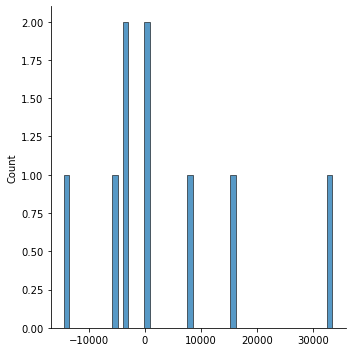

In [2]:

import seaborn as sns
sns.displot(cell_vecs[2,:,0],bins=50)
#sns.heatmap(cell_imgs[0,:,:,0])

(5000, 32)
(5000, 32)


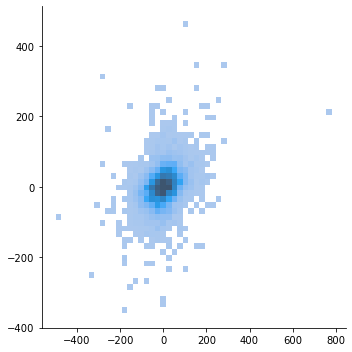

In [5]:
filters = abs(cell_vecs[:,:,0])>2.0
print(filters.shape)
Y = cell_vecs[:,:,0]*filters
print(Y.shape)
Y = Y.sum(axis=-1)*-1.0
sns.displot(x=cell_vlabel[:,0],y=Y ,bins=50)

In [11]:
cell_imgs.shape

(5000, 14, 9)